## Sustitución por moda | categoría más frecuente

Los métodos de imputación consisten en estimar los valores faltantes en base a los valores válidos de otras variables y/o casos de la muestra. El objectivo de cualquier método de imputación es producir un **conjunto completo** que pueda ser utlizado por un algoritmo de aprendizaje de máquina (machine learning). 

La estimación se puede hacer a partir de la información del conjunto completo de variables o bien de algunas variables especialmente seleccionadas.

En esta técnica, se asigna la categoría más frecuente o la moda, a los valores nulos.

### Cuáles variables se pueden sustituir por la moda/categoría más frecuente?

A pesar que la moda/categoría más frecuente puede ser calculada para variables numéricas y categóricas, en la práctica, solamente usamos esta técnica en variables categóricas. La razón es porque en las variables numéricas, la moda tiende a representar valores promedio de la muestra.

### Condiciones

- Los datos ausentes son completamente aleatorios (MCAR)
- Lo más probable es que las observaciones ausentes tengan valores como el de la mayoría de las observaciones en la variable (osea la moda o categoría mas frecuente)

La lógica es que los más probable es que el valor que deberia haber tenido el valor ausente es de hecho el valor o categoría mas frecuente de la variable.

### Ventajas

- Fácil de implementar
- Forma rápida de obtener conjuntos completos de datos
- Puede ser integrado en producción (durante el despliegue del modelo)

### Limitaciones

- Distorción de la relación entre la etiquete más frecuente con las demás variables dentro del conjunto de datos.
- Puede llevar a la sobre-representación de la etiqueta más frecuente si hay una larga proporción de valores nulos

### Cuándo usar la sustitución por la moda/categoría más frecuente?

- Los datos ausentes son completamente aleatorios(MCAR)
- No más del 5% de la variable esta ausente


## En este demo:

Vamos a aprender como implementar la sustición por la moda usando pandas y los datos Ames House Price 

- Para bajar los datos, por favor referirse a la clase en **Datasets** en la  **Sección 1** del curso.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### House Price dataset

In [4]:
# carguemos datos con unas columnas

# estas son las columnas categóricas y la variable target SalePrice (precio de venta)
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [5]:
# evaluemos el porcentaje de valores nulos por cada una de las variables
data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

La variable BsmtQual contiene solo unas observaciones con valores nulos (2.5), por lo tanto, reemplazar estas observaciones con el valor de la categoría más frecuente es una buena idea.

Por otra parte, la variable FireplaceQu, tiene valores ausentes en casi la mitad de las observaciones. POr lo tanto, si los reemplazamos con la categoría más frecuente, lo más probable es que distorcionemos la relacíon entre la categoría mas frecuente con la variable target SalePrice (precio de venta). 

Adicionalmente, si muchas observaciones están ausentes en FireplaceQu, puede que exista una razón de  it could be for a reason and not just at random, so we could be better off capturing that somehow with a different imputation technique. We will see how in the next notebook. For now, let's explore the effect of replacing NA by the most frequent categories when missing data is few or a lot.


### Para tener en cuenta

Sustitución se debe hacer en el segmento usado para entrenar el modelo, y luego deber ser propagado en el segmento de prueba. Esto significa la categoriá mas frecuente deber ser seleccionada del segmento de entrenamiento y usada para sustituir los valores ausentes en ambos segmentos - entrenamiento y prueba.


In [6]:
# separar datos en segmentos entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data['SalePrice'], # target
    test_size=0.3, # percentage of observations in the test set
    random_state=0) # seed for reproducibility

X_train.shape, X_test.shape

((1022, 3), (438, 3))

#### BsmtQual

In [7]:
# % de valores ausentes
X_train['BsmtQual'].isnull().mean()

0.023483365949119372

Text(0, 0.5, 'Number of houses')

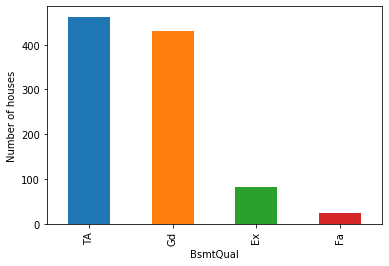

In [8]:
# exploremos el número de observaciones por categoría en BsmtQual

# usamos esta línea de codigo en la sección 3 variable characteristics

# value_counts() counts the amount of houses that show each of the labels
# in the variable indicated below

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

In [9]:
# categoría más frecuente para BsmtQual

X_train['BsmtQual'].mode()

0    TA
dtype: object

Text(0.5, 1.0, 'BsmtQual')

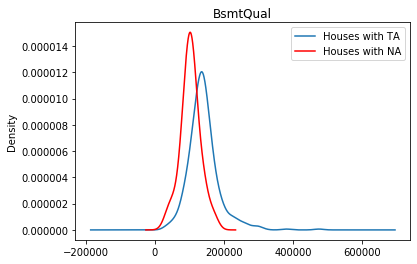

In [10]:
# grafiquemos las distribuciones de la variable target para las casas que: 

# tienen la categoría más frecuente o
# para aquellas que tienen datos ausentes

fig = plt.figure()
ax = fig.add_subplot(111)

# selección y gréfica de las casas con la etiqueta más frecuente
X_train[X_train['BsmtQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

# selección y gráfica de las casas con valores ausentes
X_train[X_train['BsmtQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

# etiquetas
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

# título
plt.title('BsmtQual')

La gráfica anterior indica que las casas con datos ausentes cuentan en promedio mucho menos que aquedllas con la etiqueta TA. Por lo tanto, si reemplazamos los valore ausentes con TA, podríamos afectar la distribución general, si hay una proporción larga de observaciones con valores nulos NA.


In [11]:
# guardemos la distribución original de SalePrice para la
# categoría más frecuente ( la usaremos más adelante)

# el uso de 'tmp' como nombre de las variables temporales
# es una práctica bastante común

tmp = X_train[X_train['BsmtQual']=='TA']['SalePrice']

In [12]:
# reemplacemos NA en los segmentos de prueba y entrenamiento

# usemos el método fillna() de pandas

# con el argumento inplace=True, indicándole a pandas
# que queremos reemplazar los valores en los datos

X_train['BsmtQual'].fillna('TA', inplace=True)
X_test['BsmtQual'].fillna('TA', inplace=True)

/Users/natisangarita/python/courses/feml/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [13]:
# revisemos que los NA se han reemplazado 

X_train['BsmtQual'].isnull().sum()

0

Text(0, 0.5, 'Número de casas')

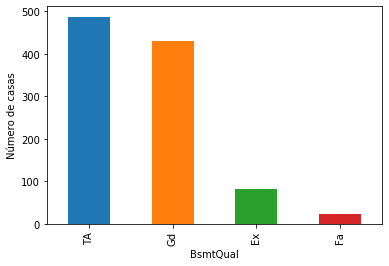

In [14]:
# evaluemos el efecto de este cambio en la distribución de las variables

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Número de casas')

De la gráfica anterior, podemos ver que ahora hay más casas con la etiqueta TA, que son las que antes tenia un valor nulo o NA. Sin embargo, tambien se puede observar que el efecto o cambio no es drámatico; la gráfica se ve casi igual a la de antes de la sustitución.


Text(0.5, 1.0, 'BsmtQual')

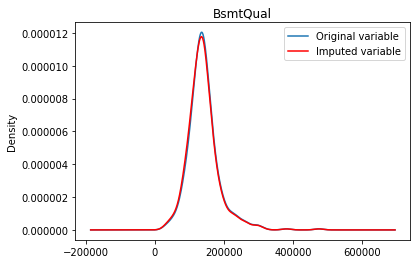

In [15]:
# grafiquemos la distribución del target (SalePrice -precio de venta)

# ha cambiado para la categoría mas frecuente?
# veamos
fig = plt.figure()
ax = fig.add_subplot(111)

# distribución original del SalePrice para casas con la categoria mas frecuente
# recuerda que la guardamos unas celdas atrás en el notebook
tmp.plot(kind='kde', ax=ax)

# distribución de la variable despues de la sustitución
X_train[X_train['BsmtQual'] == 'TA']['SalePrice'].plot(
    kind='kde', ax=ax, color='red')

# leyenda
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# título
plt.title('BsmtQual')

La distribución de los precios de las casas entre la variable original y sustituida son muy similares, porque el número de datos ausentes eran pequenos. Esto era de esperarse.

Exploremos el efecto de la sustitución por la moda cuando el porcentaje de datos ausentes es alto


#### FirePlaceQu

In [19]:
# recordemos el % de datos ausentes
X_train['FireplaceQu'].isnull().mean()

0.46771037181996084

Text(0, 0.5, 'Número de casas')

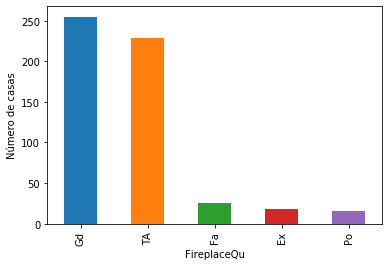

In [21]:
# exploremos el número de observaciones por categoría

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Número de casas')

In [22]:
# encontremos la categoría mas frecuente en la variable FirePlaceQu

X_train['FireplaceQu'].mode()

0    Gd
dtype: object

Text(0.5, 1.0, 'FirePlaceQu')

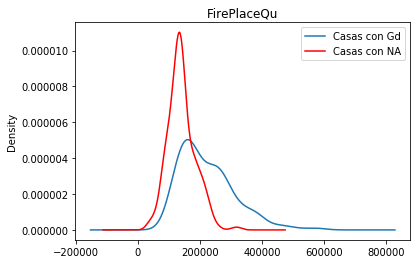

In [27]:
# grafiquemos la distribución del target (SalePrice -precio de venta)
# para las casas que tienen la categoría mas frecuente y aquellas que 
# tienen datos ausentes

fig = plt.figure()
ax = fig.add_subplot(111)

# casas con la categoría más frecuente para FirePlaceQu
X_train[X_train['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

# casas con datos ausentes en FirePlaceQu
X_train[X_train['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

# leyenda
lines, labels = ax.get_legend_handles_labels()
labels = ['Casas con Gd', 'Casas con NA']
ax.legend(lines, labels, loc='best')

plt.title('FirePlaceQu')

las distribuciones son diferentes; las casas con datos ausentes cuestan menos en general que las casas con la etiquete Gd.

In [25]:
# Guardemos la distribuciones originales de SalePrice para
# las casas que tienen la etiquete Gd en FirePlaceQu.

tmp = X_train[X_train['FireplaceQu']=='Gd']['SalePrice']

In [19]:
# # Reemplacemos los valores nulos NA con la etiqueta Gd en los segmentos de entrenamiento y prueba

X_train['FireplaceQu'].fillna('Gd', inplace=True)
X_test['FireplaceQu'].fillna('Gd', inplace=True)

Text(0, 0.5, 'Número de casas')

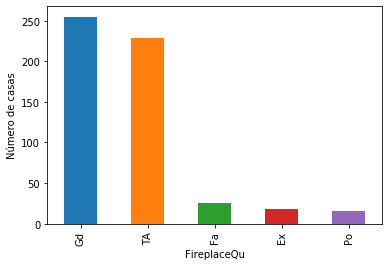

In [26]:
# exploremos el número de observaciones por categoría

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Número de casas')

En este caso vemos que hay una gran distorción en la distribución original de la variable. Ahora hay muchas casas que tienen la etiqueta Gd, con respecto a las casas que tienen las otras categorías. Originalmente, la mitad de las observaciones en FirePlaceQu estaban ausentes. Ahora, todos los valores contienen Gd. Por eso es que vemos un gran incremento en Gd an la gráfica de barras.


Text(0.5, 1.0, 'FirePlaceQu')

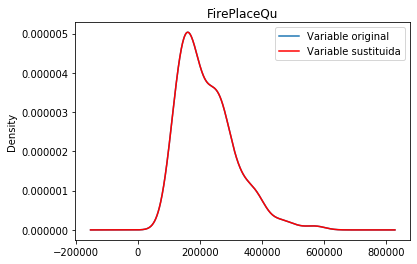

In [28]:
# grafiquemos las distribuciones del target para la variable original y
# la variable despues de la sustitución

fig = plt.figure()
ax = fig.add_subplot(111)

# distribución original de la variable
# recuerda que la guardamos unas celdas atrás en el notebook

tmp.plot(kind='kde', ax=ax)

# distribución de la variable luego de la sustitución
X_train[X_train['FireplaceQu'] == 'Gd']['SalePrice'].plot(
    kind='kde', ax=ax, color='red')

# leyenda
lines, labels = ax.get_legend_handles_labels()
labels = ['Variable original', 'Variable sustituida']
ax.legend(lines, labels, loc='best')

plt.title('FirePlaceQu')

El promedio del valor de las casas para la categoría más frecuente ha decrecido dramáticamente luego de añadir las casas con valores nulos NA, siguiendo la re=categorización de NA con la categoría más frecuente.

Entonces, la importancia de esta etiqueta en particular para la predicción de los precios de las casas, es encubierta o cambiada por la adición de los valores ausentes.

En casos como este, cuando el porcentaje de valores ausentes es alto (~50%), es mejor crear una nueva categoría para las observaciones con NA. Estudiaremos esto en la siguiente clase.

**Esto es todo por este demo. En las siguientes secciones estudiaremos como sustituir usando scikit-learn y feature engine como parte de machine learning pipeline.**